# Modules

In [1]:
%matplotlib widget
import glob
import sncosmo
import numpy as np
import pandas as pd
import astropy as ap
import ipywidgets as ipw
import matplotlib.pyplot as plt
import ztfquery

from ztfquery import marshal
from ztflc import forcephotometry
from sncosmo.models import Source, Model, get_source
from sncosmo import get_bandpass, get_magsystem
from sncosmo.photdata import photometric_data

# ZTFLC tests 

In [2]:
m = marshal.MarshalAccess.load_local("Cosmology")

In [6]:
rd_sn = 'ZTF19acxyumq'
ra, dec = m.get_target_coordinates(rd_sn).values[0]
jdmin, jdmax = m.get_target_jdrange(rd_sn)
print(rd_sn, 'ra =', ra, 'dec =', dec)

ZTF19acxyumq ra = 172.67566440000002 dec = 47.5066018


In [7]:
zquery = ztfquery.query.ZTFQuery()
zquery.load_metadata(kind='ref', radec=[ra, dec], size=0.0001)

In [8]:
zquery.download_data()

No parallel downloading
downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001753/zg/ccd15/q1/ztf_001753_zg_c15_q1_refimg.fits to /home/nicolas/Work/Data/ztf/ref/001/field001753/zg/ccd15/q1/ztf_001753_zg_c15_q1_refimg.fits
downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000754/zg/ccd08/q1/ztf_000754_zg_c08_q1_refimg.fits to /home/nicolas/Work/Data/ztf/ref/000/field000754/zg/ccd08/q1/ztf_000754_zg_c08_q1_refimg.fits
downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001753/zi/ccd15/q1/ztf_001753_zi_c15_q1_refimg.fits to /home/nicolas/Work/Data/ztf/ref/001/field001753/zi/ccd15/q1/ztf_001753_zi_c15_q1_refimg.fits
downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000754/zi/ccd08/q1/ztf_000754_zi_c08_q1_refimg.fits to /home/nicolas/Work/Data/ztf/ref/000/field000754/zi/ccd08/q1/ztf_000754_zi_c08_q1_refimg.fits
downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/fiel

In [36]:
# Setup the target
fp = forcephotometry.ForcePhotometry.from_coords(ra, dec,
                                                 jdmin=jdmin, jdmax=jdmax)

In [37]:
# Load the ztf metadata
fp.load_metadata()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [31]:
# download it locally
fp.io.download_data(show_progress=True,
                    notebook=True)

FloatProgress(value=0.0)

parallel downloading ; asking for 4 processes
/home/nicolas/Work/Data/ztf/sci/2020/0220/368877/ztf_20200220368877_000754_zg_c08_o_q1_scimrefdiffimg.fits.fz already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0107/379583/ztf_20200107379583_000754_zi_c08_o_q1_scimrefdiffimg.fits.fz already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0201/466192/ztf_20200201466192_000754_zg_c08_o_q1_scimrefdiffimg.fits.fz already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0131/346574/ztf_20200131346574_000754_zr_c08_o_q1_scimrefdiffimg.fits.fz already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0118/365301/ztf_20200118365301_000754_zr_c08_o_q1_scimrefdiffimg.fits.fz already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0107/401956/ztf_20200107401956_000754_zi_c08_o_q1_scimrefdiffimg.fits.fz already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2019/1214/509109/ztf_20191214509109_000754_zi_c08_o_q1_scimrefdiffimg.fits.fz already exists: skipped
/home/nicolas/Wo

FloatProgress(value=0.0)

parallel downloading ; asking for 4 processes
/home/nicolas/Work/Data/ztf/sci/2020/0220/368877/ztf_20200220368877_000754_zg_c08_o_q1_diffimgpsf.fits already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0107/379583/ztf_20200107379583_000754_zi_c08_o_q1_diffimgpsf.fits already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0201/466192/ztf_20200201466192_000754_zg_c08_o_q1_diffimgpsf.fits already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0107/401956/ztf_20200107401956_000754_zi_c08_o_q1_diffimgpsf.fits already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0118/365301/ztf_20200118365301_000754_zr_c08_o_q1_diffimgpsf.fits already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0131/346574/ztf_20200131346574_000754_zr_c08_o_q1_diffimgpsf.fits already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2020/0113/379838/ztf_20200113379838_000754_zi_c08_o_q1_diffimgpsf.fits already exists: skipped
/home/nicolas/Work/Data/ztf/sci/2019/1214/509109/ztf_201912145091

In [30]:
# Load the ztf file you are going to need (diffimg and psfimg)
fp.load_filepathes()

In [32]:
# and run the forcephotometry
fp.run_forcefit(verbose=True)

Starting run_forcefit() for 225 image differences
fitting 0 
fitting 1 
fitting 2 
fitting 3 
{'ampl_guess': 321.31967414196066, 'sigma_guess': 4.266781814841088, 'ampl_boundaires': [125.60134978270065, 1606.5983707098032], 'sigma_boundaries': [0.4266781814841088, 11.627594947814941]}
{'ampl_guess': 814.9796041928278, 'sigma_guess': 7.262034872407866, 'ampl_boundaires': [213.54680210841963, 4074.898020964139], 'sigma_boundaries': [0.7262034872407865, 26.551206588745117]}
fitting 4 
fitting 5 
{'ampl_guess': 647.9642504505798, 'sigma_guess': 6.530443856401131, 'ampl_boundaires': [157.50336380973053, 3239.821252252899], 'sigma_boundaries': [0.6530443856401131, 24.97604751586914]}


/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


{'ampl_guess': 456.08433450524086, 'sigma_guess': 4.9631351251501945, 'ampl_boundaires': [134.15206903784744, 2280.421672526204], 'sigma_boundaries': [0.49631351251501943, 15.038933753967285]}
fitting 6 
fitting 7 
{'ampl_guess': 1056.2557329766241, 'sigma_guess': 6.716006672216747, 'ampl_boundaires': [219.3809778876988, 5281.278664883121], 'sigma_boundaries': [0.6716006672216748, 28.827302932739258]}
{'ampl_guess': 368.17697729917415, 'sigma_guess': 7.014287163107195, 'ampl_boundaires': [217.8019810758459, 1840.8848864958707], 'sigma_boundaries': [0.7014287163107195, 21.357858657836914]}
fitting 8 


/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/ztflc-0.2.2-py3.7.egg/ztflc/fitter.py:136: RuntimeWarning: divide by zero encountered in log
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


{'ampl_guess': 981.4140456084905, 'sigma_guess': 19.128175321002345, 'ampl_boundaires': [678.9713829608178, 4907.070228042452], 'sigma_boundaries': [1.9128175321002345, 55.478580474853516]}
fitting 9 
fitting 10 
{'ampl_guess': 1054.299801020019, 'sigma_guess': 15.880048388417588, 'ampl_boundaires': [446.1070084788783, 5271.499005100095], 'sigma_boundaries': [1.588004838841759, 44.76513671875]}
fitting 11 
{'ampl_guess': 805.1008817994608, 'sigma_guess': 17.16335297555719, 'ampl_boundaires': [488.629155866263, 4025.5044089973044], 'sigma_boundaries': [1.716335297555719, 42.23920822143555]}


/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


{'ampl_guess': 390.03753277787666, 'sigma_guess': 4.585114514310453, 'ampl_boundaires': [135.4483644911361, 1950.1876638893834], 'sigma_boundaries': [0.45851145143104527, 14.265856742858887]}
{'ampl_guess': 259.00579253534386, 'sigma_guess': 4.115370814426344, 'ampl_boundaires': [134.9501828310246, 1295.0289626767194], 'sigma_boundaries': [0.41153708144263434, 11.397281646728516]}
fitting 12 
fitting 13 
fitting 14 
{'ampl_guess': 624.9819543401882, 'sigma_guess': 9.025674124624096, 'ampl_boundaires': [298.2215818721842, 3124.9097717009404], 'sigma_boundaries': [0.9025674124624097, 26.9711971282959]}
fitting 15 
{'ampl_guess': 144.58920430585647, 'sigma_guess': 14.179012549904956, 'ampl_boundaires': [285.45396044779585, 722.9460215292823], 'sigma_boundaries': [1.4179012549904955, 25.884641647338867]}
{'ampl_guess': 65.85247741282257, 'sigma_guess': 8.660310215596102, 'ampl_boundaires': [131.79970496134658, 329.26238706411283], 'sigma_boundaries': [0.8660310215596102, 14.026735305786133

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


fitting 19 
{'ampl_guess': 541.3607188242372, 'sigma_guess': 6.198065279056787, 'ampl_boundaires': [169.41372073557798, 2706.803594121186], 'sigma_boundaries': [0.6198065279056787, 19.4750919342041]}
{'ampl_guess': 1410.8854967065176, 'sigma_guess': 13.630912250456158, 'ampl_boundaires': [445.2773304311901, 7054.427483532589], 'sigma_boundaries': [1.3630912250456158, 45.779415130615234]}
{'ampl_guess': 1442.2056517661877, 'sigma_guess': 18.59805866567393, 'ampl_boundaires': [583.8733806798209, 7211.028258830938], 'sigma_boundaries': [1.8598058665673929, 60.57493591308594]}
fitting 20 
fitting 21 
fitting 22 
{'ampl_guess': 284.42927440056224, 'sigma_guess': 5.515953674495187, 'ampl_boundaires': [193.42104712621216, 1422.1463720028112], 'sigma_boundaries': [0.5515953674495188, 14.119415283203125]}
fitting 23 
{'ampl_guess': 232.7861379686375, 'sigma_guess': 5.456158658710775, 'ampl_boundaires': [183.93312481823406, 1163.9306898431873], 'sigma_boundaries': [0.5456158658710775, 12.1963691

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/ztflc-0.2.2-py3.7.egg/ztflc/fitter.py:136: RuntimeWarning: divide by zero encountered in log


{'ampl_guess': 576.6639557818492, 'sigma_guess': 6.292906767905188, 'ampl_boundaires': [192.98721791471004, 2883.319778909246], 'sigma_boundaries': [0.6292906767905188, 18.262287139892578]}
fitting 39 
fitting 40 
fitting 41 
{'ampl_guess': 1074.3480844511664, 'sigma_guess': 6.618774245227961, 'ampl_boundaires': [176.8288822285393, 5371.7404222558325], 'sigma_boundaries': [0.6618774245227961, 31.74456214904785]}
{'ampl_guess': 57.9294335823182, 'sigma_guess': 6.979383849408502, 'ampl_boundaires': [116.05278509298691, 289.647167911591], 'sigma_boundaries': [0.6979383849408503, 11.804153442382812]}
fitting 42 
{'ampl_guess': 655.1401317542392, 'sigma_guess': 4.861159704671211, 'ampl_boundaires': [140.25769166870523, 3275.700658771196], 'sigma_boundaries': [0.4861159704671211, 18.689699172973633]}
fitting 43 
{'ampl_guess': 441.80554929581024, 'sigma_guess': 13.112351560486328, 'ampl_boundaires': [344.77701180464294, 2209.027746479051], 'sigma_boundaries': [1.3112351560486328, 33.09754180

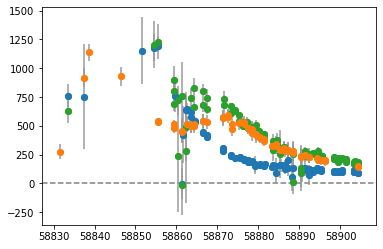

In [33]:
fp.store('../Data/ztf/forcephotometry/hand_ZTF19acxyumq.csv')
fp.show_lc()